<a href="https://colab.research.google.com/github/AkshayKohad/ML-Tutorial/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
plt.style.use("seaborn")

<ipython-input-83-2e961e0228c3>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [84]:
# Step-1 Generate Toy(Dummy) Dataset

X,y = make_blobs(n_samples=2000,n_features=2,cluster_std=3,centers=2,random_state=42)
n_features=2
print(X.shape,y.shape)

(2000, 2) (2000,)


In [85]:
print(y)

[0 0 0 ... 1 0 1]


In [86]:
# Step-2 Visualize Dataset

def visualise(X,y):
  plt.scatter(X[:,0],X[:,1],c=y,cmap="viridis")
  plt.show()

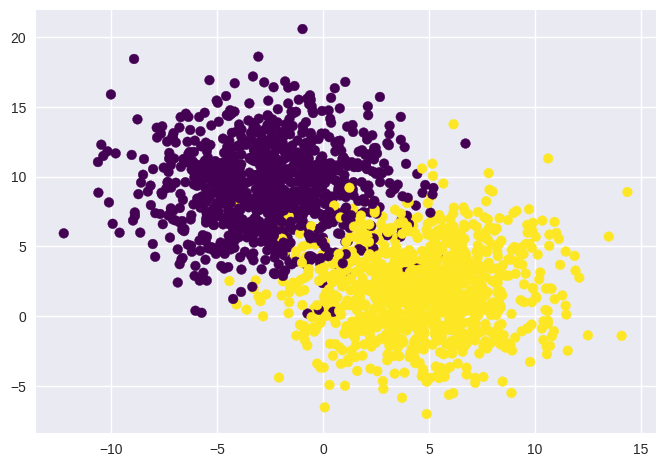

In [87]:
visualise(X,y)

In [88]:
# Step-3
def normalise(X):
  u = X.mean(axis=0)
  std = X.std(axis=0)

  return (X-u)/std

In [89]:
X = normalise(X)

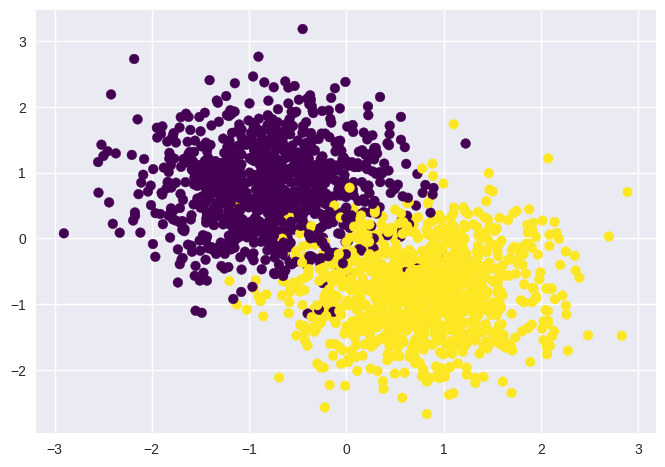

In [90]:
visualise(X,y)

In [91]:
# Step-4 Train Test split

XT,Xt,yT,yt = train_test_split(X,y,test_size=0.25,shuffle=False,random_state=0)

In [92]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(1500, 2) (1500,)
(500, 2) (500,)


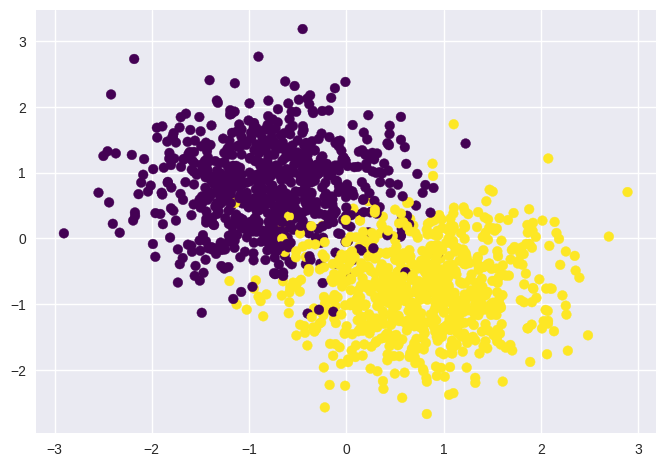

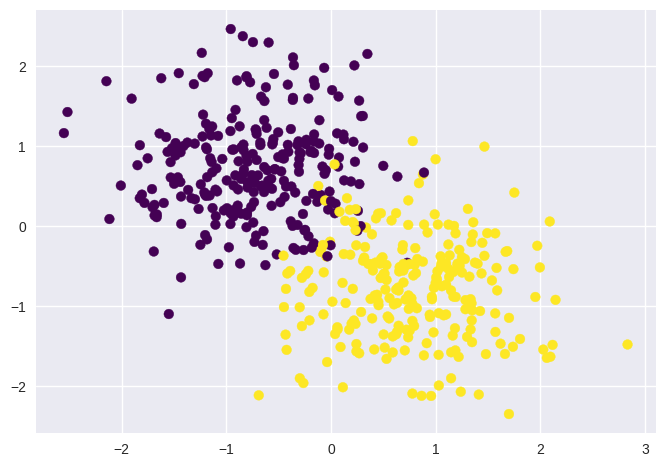

In [93]:
visualise(XT,yT)
visualise(Xt,yt)

In [94]:
# Model
def sigmoid(z):
  return 1/(1+np.exp(-z))


def hypothesis(X,theta):
  return sigmoid(np.dot(X,theta))

#Binary Cross Entropy
def error(y,yp):
  loss = -np.mean(y*np.log(yp) + (1-yp)*np.log(1-yp))
  return loss

# Gradient
def gradient(X,y,yp):
  m = X.shape[0]
  grad = -(1/m)*np.dot(X.T,(y-yp))
  return grad


def train(X,y,max_iters=100,learning_rate=0.1):

  # randomly init theta
  theta = np.random.randn(n_features+1,1);

  error_list = []

  for i in range(max_iters):
    yp = hypothesis(X,theta)
    e = error(y,yp)
    error_list.append(e)
    grad = gradient(X,y,yp)

    theta = theta-learning_rate*grad


  plt.plot(error_list)
  return theta


def predict(X,theta):
  h = hypothesis(X,theta)
  preds = np.zeros((X.shape[0],1),dtype='int')

  preds[h >= 0.5] = 1

  return preds


def accuracy(X,y,theta):
  preds = predict(X,theta)

  return ((y==preds).sum())/y.shape[0]*100



In [95]:
def addExtraColumn(X):
  if X.shape[1] == n_features:
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))

  return X


In [96]:
XT = addExtraColumn(XT)
print(XT)

[[ 1.         -1.43211741  0.65078613]
 [ 1.         -0.47100516  0.87372191]
 [ 1.         -0.40182883  2.1275269 ]
 ...
 [ 1.          0.02390726  0.74454457]
 [ 1.         -0.35936993  0.18771848]
 [ 1.          1.09360417 -1.10077065]]


In [97]:
Xt = addExtraColumn(Xt)
print(Xt)

[[ 1.         -1.17860853  1.9119189 ]
 [ 1.          0.70445084 -1.55536144]
 [ 1.          0.39063944 -0.10336496]
 ...
 [ 1.          1.96970601 -0.24632291]
 [ 1.         -0.80805197 -0.01411826]
 [ 1.          0.83964924  0.53655099]]


In [98]:
print(XT.shape)

(1500, 3)


In [99]:
yT = yT.reshape((-1,1))
yt = yt.reshape((-1,1))

In [100]:
print(yT.shape)
print(yt.shape)

(1500, 1)
(500, 1)


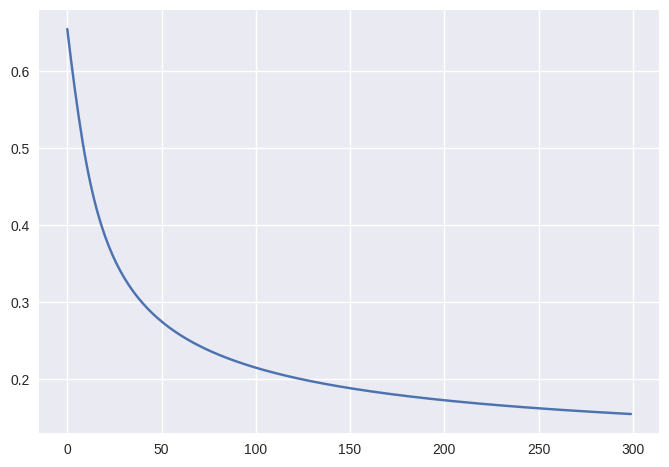

In [101]:
theta = train(XT,yT,max_iters=300,learning_rate=0.2)

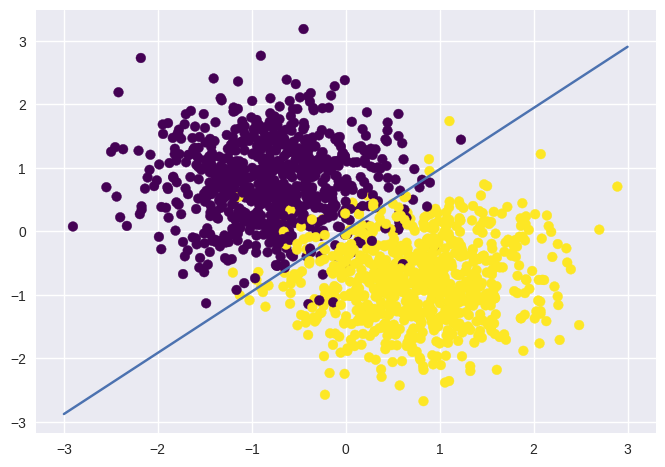

In [102]:
plt.scatter(XT[:,1],XT[:,2],c=yT,cmap="viridis")

x1 = np.linspace(-3,3,6)

x2 = -(theta[0] + theta[1]*x1)/theta[2]

plt.plot(x1,x2)

plt.show()

In [103]:
# predictions

predict(Xt,theta)

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [104]:
#Train Accuracy
accuracy(XT,yT,theta)

95.86666666666666

In [105]:
#Test Accuracy
accuracy(Xt,yt,theta)

96.2

In [106]:
# Using Sk learn Library

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
# Create

model  = LogisticRegression()



In [109]:
# Training
model.fit(XT,yT.reshape(-1,))

LogisticRegression()

In [110]:
# Predictions
model.predict(XT)

array([0, 0, 0, ..., 0, 0, 1])

In [111]:
model.score(XT,yT)

0.958

In [112]:
model.score(Xt,yt)

0.962